<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M1/notebooks/Homework1_MinimalSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
trips = pd.read_csv('https://sds-aau.github.io/SDS-master/M1/data/trips.csv')

In [ ]:
people = pd.read_csv('https://sds-aau.github.io/SDS-master/M1/data/people.csv')

In [ ]:
country = pd.read_csv('https://sds-aau.github.io/SDS-master/M1/data/countrylist.csv')

In [ ]:
trips.head()

,Unnamed: 0,username,country,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug
0,0,@lewellenmichael,Mexico,MX,mexico,2018-06-15,2018-06-04,21,-101,Guanajuato,mexico
1,1,@lewellenmichael,Mexico,MX,mexico,2018-06-03,2018-05-31,19,-99,Mexico City,mexico-city-mexico
2,2,@lewellenmichael,Mexico,MX,mexico,2017-11-05,2017-11-01,21,-86,Cancun,cancun-mexico
3,3,@lewellenmichael,Jordan,JO,jordan,2017-08-07,2017-07-24,31,35,Amman,amman-jordan
4,4,@waylandchin,China,CN,china,2017-03-18,2017-02-17,40,122,Yingkou,china


In [ ]:
start_dates = pd.to_datetime(trips.date_start, errors='coerce')

In [ ]:
trips.index = start_dates

In [ ]:
end_dates = pd.to_datetime(trips.date_end, errors='coerce')

In [ ]:
duration = end_dates-start_dates

In [ ]:
trips['duration'] = [x.days for x in duration]

In [ ]:
boundary = trips.duration.quantile(q=0.97)

In [ ]:
trips_subset = trips[trips.duration <= boundary]

In [ ]:
country

,alpha_2,region,sub_region
0,AF,Asia,Southern Asia
1,AX,Europe,Northern Europe
2,AL,Europe,Southern Europe
3,DZ,Africa,Northern Africa
4,AS,Oceania,Polynesia
...,...,...,...
244,WF,Oceania,Polynesia
245,EH,Africa,Northern Africa
246,YE,Asia,Western Asia
247,ZM,Africa,Sub-Saharan Africa


In [ ]:
trips_merged= trips.merge(country, how='left', left_on='country_code', right_on='alpha_2')

In [ ]:
people.education_raw.str.contains('High School').sum()

130

In [ ]:
people.education_raw.value_counts()

Bachelor's Degree                                  197
Master's Degree                                    115
High School                                         58
High School, Bachelor's Degree                      43
High School, Bachelor's Degree, Master's Degree     29
Bachelor's Degree, Master's Degree                   9
Name: education_raw, dtype: int64

In [ ]:
people.head()

,Unnamed: 0,username,followers,following,work_raw,education_raw
0,0,@lewellenmichael,1,2,"Software Dev, Startup Founder, Finance, Crypto...","High School, Bachelor's Degree"
1,1,@waylandchin,0,2,NaN,NaN
2,2,@karan,2,1,NaN,NaN
3,3,@skaboss217,0,1,NaN,NaN
4,4,@apwn,17,426,Web Dev,NaN


In [ ]:
people['start_up'] = people.work_raw.str.contains('Startup Founder')

In [ ]:
people['start_up'].sum()

721

In [ ]:
people[people['start_up'] == True].followers.sort_values(ascending=False)

2043    2182
494      503
1909     429
403      393
1298     259
        ... 
3132       0
2324       0
3078       0
3066       0
4011       0
Name: followers, Length: 721, dtype: int64

In [ ]:
people.loc[2043,:]

Unnamed: 0                                                  2043
username                                               @levelsio
followers                                                   2182
following                                                    353
work_raw                 Software Dev, Startup Founder, Creative
education_raw    High School, Bachelor's Degree, Master's Degree
start_up                                                    True
Name: 2043, dtype: object

In [ ]:
trips_merged[trips_merged.sub_region == 'Western Europe'].groupby(by='country').duration.sum()

country
Austria           10806.0
Belgium           10834.0
France            62936.0
Germany          127909.0
Liechtenstein         1.0
Luxembourg         3350.0
Monaco               64.0
Netherlands       82488.0
Switzerland       27494.0
Name: duration, dtype: float64

In [ ]:
trips_merged.sub_region.unique()

array(['Latin America and the Caribbean', 'Western Asia', 'Eastern Asia',
       'South-eastern Asia', 'Southern Asia', 'Northern America', nan,
       'Western Europe', 'Sub-Saharan Africa', 'Eastern Europe',
       'Northern Europe', 'Southern Europe', 'Australia and New Zealand',
       'Northern Africa', 'Melanesia', 'Central Asia', 'Polynesia'],
      dtype=object)

In [ ]:
trips.country.value_counts()

United States     7573
Thailand          3372
United Kingdom    2230
Germany           2019
Spain             1975
                  ... 
Côte d'Ivoire        1
EX17                 1
Palestine            1
Sanur                1
Pai                  1
Name: country, Length: 249, dtype: int64

In [ ]:
trips_merged.index = start_dates

In [ ]:
trips_merged[trips_merged.index.year == 2017].sub_region.value_counts()

South-eastern Asia                 2310
Northern America                   2154
Southern Europe                    1663
Western Europe                     1518
Latin America and the Caribbean    1296
Eastern Europe                      726
Eastern Asia                        720
Northern Europe                     544
Australia and New Zealand           400
Sub-Saharan Africa                  342
Southern Asia                       263
Western Asia                        225
Northern Africa                     112
Melanesia                             7
Central Asia                          4
Polynesia                             2
Name: sub_region, dtype: int64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


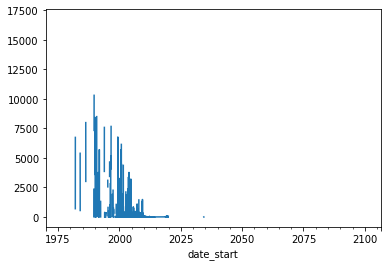

In [ ]:
trips_merged.resample('W').duration.median().plot()

In [ ]:
median_trips = trips_merged.resample('W').duration.median()

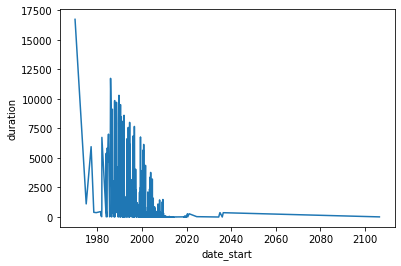

In [ ]:
sns.lineplot(x = median_trips.index, y = median_trips)